### Installing the pre-requisites

In [8]:
!pip install -U LibRecommender
!pip install ujson
!pip install redis

In [9]:
!pip install tensorflow==2.15.0

In [10]:
%pip install pandas numpy scikit-learn torch torchvision

In [12]:
!pip install tensorflow==2.12.0 --force-reinstall
!pip install ml_dtypes==0.2.0
import tensorflow as tf

  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━

  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Attempting uninstall: ml_dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tensorstore 0.1.74 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
flax 0.10.6 requires jax>=

ImportError: /usr/local/lib/python3.11/dist-packages/tensorflow/python/lib/core/_pywrap_bfloat16.so: undefined symbol: _ZN3tsl19Float8_E4M3B11DtypeEv, version tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

### Importing the libraries
LibRecommender is an easy-to-use recommender system focused on end-to-end recommendation process. It contains a training(libreco) and serving(libserving) module to let users quickly train and deploy different kinds of recommendation models.0

In [2]:
import pandas as pd
from libreco.data import random_split, DatasetFeat
from libreco.algorithms import YouTubeRanking,SIM,DIN,Transformer
from libreco.evaluation import evaluate

Instructions for updating:
non-resource variables are not supported in the long term


### Import the data
 With all the answers we will predict the frequency of flares and confirm from patients whether the prediction is correct or not.

In [6]:
data  = pd.read_csv("./HS_questionnaire_responses.csv")

In [7]:
data.head()

,Age,Gender,Occupation,Diagnosis_History,HS_Frequency_Flareups,HS_Severity_Symptoms,Other_Medical_Conditions,Current_Medications,Past_Surgeries,Water_Intake,...,Type_Water_Swimming,Swimming_Effect_HS,Skin_Products_Swimming,Swimming_Comfort,Swimming_Impact_HS,Pregnancy_After_HS,Pregnancy_Symptoms_HS,Pregnancy_Consultations,Postpartum_Changes,Breastfeeding_HS_Management
0,46-60,Non-binary/Other,Self-employed,Over 10 years ago,Monthly,Moderate,Others,Other,Incision and drainage,1-2 liters,...,Saltwater,Improvement in symptoms,Yes,Not applicable,Somewhat beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Not applicable
1,46-60,Male,Other,4-6 years ago,Annually,Severe,Autoimmune disorders,Pain relievers,Other,More than 4 liters,...,Saltwater,No noticeable change,Not applicable,Neutral,Highly beneficial,Prefer not to say,Slight worsening,"Yes, with other specialists",Slight improvement,Stopped HS treatment
2,18-30,Female,Student,4-6 years ago,Biannually,Severe,Autoimmune disorders,Antibiotics,Surgical removal of affected skin,More than 4 liters,...,Chlorinated pools,Improvement in symptoms,Yes,Neutral,Highly beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Stopped HS treatment
3,Under 18,Male,Unemployed,7-10 years ago,Monthly,Moderate,Autoimmune disorders,Pain relievers,Other,3-4 liters,...,Other,Improvement in symptoms,Yes,Somewhat comfortable,Highly beneficial,Prefer not to say,Not applicable,"Yes, with an obstetrician",Significant worsening,Stopped HS treatment
4,Under 18,Female,Student,1-3 years ago,Annually,Severe,Heart disease,Antibiotics,Surgical removal of affected skin,3-4 liters,...,Other,Worsening of symptoms,Not applicable,Very comfortable,Somewhat detrimental,Prefer not to say,Slight worsening,"Yes, with an obstetrician",Slight improvement,Stopped HS treatment


### Data Preprocessing

In [8]:
print(data.columns)

Index(['Age', 'Gender', 'Occupation', 'Diagnosis_History',
       'HS_Frequency_Flareups', 'HS_Severity_Symptoms',
       'Other_Medical_Conditions', 'Current_Medications', 'Past_Surgeries',
       'Water_Intake', 'Smoking_Alcohol', 'Sleep_Patterns',
       'Exercise_Frequency', 'Exercise_Type', 'Skin_Care_Routine',
       'Skin_Care_Products', 'Stress_Level', 'Coping_Mechanisms',
       'Menstrual_Cycle', 'Diet_Composition', 'Processed_Foods', 'Sugar_Foods',
       'Dairy_Products', 'Gluten_Foods', 'Food_Allergies', 'Diet_Relation_HS',
       'Diet_Modification_Willingness', 'Supplement_Use',
       'Satisfaction_Current_Diet', 'Nutritional_Counseling',
       'Climate_Living_Area', 'Avg_Temperature', 'Humidity_Level',
       'Weather_Impact_HS', 'Sun_Exposure', 'Sun_Impact_HS', 'Sun_Protection',
       'Housing_Ventilation', 'Hair_Removal_Frequency', 'Hair_Removal_Methods',
       'Post_Hair_Removal_Irritation', 'Soothing_Products_After_Hair_Removal',
       'Swimming_Frequency', 'Ty

In [9]:
# Define all the columns with other option
# These columns will have free-text data whenever user clicks on other option
# Convert every such option to other
other_columns = {
    "Occupation": ["Student", "Employed (full-time/part-time)", "Unemployed", "Retired","Self-employed"],
    "Other_Medical_Conditions" :["None", "Diabetes", "PCOS", "Heart disease", "Autoimmune disorders"],
    "Current_Medications": ["Antibiotics", "Hormonal treatments","Pain relievers", "Biologics","None"],
    "Past_Surgeries": ["None", "Incision and drainage", "Laser therapy", "Surgical removal of affected skin"],
    "Coping_Mechanisms": ["Exercise", "Meditation/Yoga", "Therapy/Counseling" , "None"],
    "Food_Allergies": ["None","Lactose intolerance", "Gluten intolerance (Celiac, non-Celiac gluten sensitivity)", "Nut allergy"],
    "Supplement_Use": ["I regularly take dietary supplements (vitamins, minerals, etc.)","I occasionally take dietary supplements", "I do not take dietary supplements"],
    "Type_Water_Swimming": ["Chlorinated pools", "Saltwater (ocean, sea)", "Freshwater (lakes, rivers)"],
    "Exercise_Type": ["Walking","Running", "Gym workouts", "Yoga/Pilates"]

}

In [10]:
# Remove extra space at the start of column name

data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.replace('\n', '')
data.columns = data.columns.str.replace(':', '')

In [11]:
# Transform other values into the string other

def transform_values(data, other_columns):
  for column, possible_values in other_columns.items():
    for i, row in data.iterrows():
      if row[column] not in possible_values:
        data.at[i, column] = "Other"
  return data

data = transform_values(data.copy(), other_columns)

In [12]:
data[list(other_columns.keys())].head()

,Occupation,Other_Medical_Conditions,Current_Medications,Past_Surgeries,Coping_Mechanisms,Food_Allergies,Supplement_Use,Type_Water_Swimming,Exercise_Type
0,Self-employed,Other,Other,Incision and drainage,Meditation/Yoga,Nut allergy,Other,Other,Gym workouts
1,Other,Autoimmune disorders,Pain relievers,Other,Other,Other,Other,Other,Yoga/Pilates
2,Student,Autoimmune disorders,Antibiotics,Surgical removal of affected skin,Meditation/Yoga,Nut allergy,Other,Chlorinated pools,Gym workouts
3,Unemployed,Autoimmune disorders,Pain relievers,Other,Other,Lactose intolerance,Other,Other,Walking
4,Student,Heart disease,Antibiotics,Surgical removal of affected skin,Exercise,Lactose intolerance,Other,Other,Other


In [13]:
# Define all the different types of columns

def remove_strings(list1, list2):
    list3 = [value for value in list1 if value not in list2]
    return list3

In [14]:
# replace Nan in each col with string "Not Specified"

data = data.applymap(lambda x: "Not Specified" if pd.isna(x) else x)


<ipython-input-14-b2fd40d22b1c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: "Not Specified" if pd.isna(x) else x)


## Defining the data in LibReco terms

sparse_cols = features with multiple categorical values

item_cols = features that we are predicting

user_cols = features used to predict

dense_cols = features with numerical data

Also data in LibReco should not contain any missing values at all

In [15]:
# Libreco requires that the data have three columns at the start
# User to uniquely identify the user
# Item to recognize the item we are recommending
# Label to recognize rating given to each item

# create a new column called "user" and assign it to the first column with the value of row index
data.insert(0, "user", data.index)


In [16]:
data.head()

,user,Age,Gender,Occupation,Diagnosis_History,HS_Frequency_Flareups,HS_Severity_Symptoms,Other_Medical_Conditions,Current_Medications,Past_Surgeries,...,Type_Water_Swimming,Swimming_Effect_HS,Skin_Products_Swimming,Swimming_Comfort,Swimming_Impact_HS,Pregnancy_After_HS,Pregnancy_Symptoms_HS,Pregnancy_Consultations,Postpartum_Changes,Breastfeeding_HS_Management
0,0,46-60,Non-binary/Other,Self-employed,Over 10 years ago,Monthly,Moderate,Other,Other,Incision and drainage,...,Other,Improvement in symptoms,Yes,Not applicable,Somewhat beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Not applicable
1,1,46-60,Male,Other,4-6 years ago,Annually,Severe,Autoimmune disorders,Pain relievers,Other,...,Other,No noticeable change,Not applicable,Neutral,Highly beneficial,Prefer not to say,Slight worsening,"Yes, with other specialists",Slight improvement,Stopped HS treatment
2,2,18-30,Female,Student,4-6 years ago,Biannually,Severe,Autoimmune disorders,Antibiotics,Surgical removal of affected skin,...,Chlorinated pools,Improvement in symptoms,Yes,Neutral,Highly beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Stopped HS treatment
3,3,Under 18,Male,Unemployed,7-10 years ago,Monthly,Moderate,Autoimmune disorders,Pain relievers,Other,...,Other,Improvement in symptoms,Yes,Somewhat comfortable,Highly beneficial,Prefer not to say,Not applicable,"Yes, with an obstetrician",Significant worsening,Stopped HS treatment
4,4,Under 18,Female,Student,1-3 years ago,Annually,Severe,Heart disease,Antibiotics,Surgical removal of affected skin,...,Other,Worsening of symptoms,Not applicable,Very comfortable,Somewhat detrimental,Prefer not to say,Slight worsening,"Yes, with an obstetrician",Slight improvement,Stopped HS treatment


In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the user column
encoder.fit(data["user"].values.reshape(-1, 1))

# Transform the user column
data["user"] = encoder.transform(data["user"].values.reshape(-1, 1))


In [18]:
# Give every item a label of 1 as a defaul
import numpy as np
data['label'] = pd.Series(np.ones(len(data),dtype=int))


In [19]:
# move the label column to the second column
data.insert(1, "label", data.pop("label"))
data.head()

,user,label,Age,Gender,Occupation,Diagnosis_History,HS_Frequency_Flareups,HS_Severity_Symptoms,Other_Medical_Conditions,Current_Medications,...,Type_Water_Swimming,Swimming_Effect_HS,Skin_Products_Swimming,Swimming_Comfort,Swimming_Impact_HS,Pregnancy_After_HS,Pregnancy_Symptoms_HS,Pregnancy_Consultations,Postpartum_Changes,Breastfeeding_HS_Management
0,0.0,1,46-60,Non-binary/Other,Self-employed,Over 10 years ago,Monthly,Moderate,Other,Other,...,Other,Improvement in symptoms,Yes,Not applicable,Somewhat beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Not applicable
1,1.0,1,46-60,Male,Other,4-6 years ago,Annually,Severe,Autoimmune disorders,Pain relievers,...,Other,No noticeable change,Not applicable,Neutral,Highly beneficial,Prefer not to say,Slight worsening,"Yes, with other specialists",Slight improvement,Stopped HS treatment
2,2.0,1,18-30,Female,Student,4-6 years ago,Biannually,Severe,Autoimmune disorders,Antibiotics,...,Chlorinated pools,Improvement in symptoms,Yes,Neutral,Highly beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Stopped HS treatment
3,3.0,1,Under 18,Male,Unemployed,7-10 years ago,Monthly,Moderate,Autoimmune disorders,Pain relievers,...,Other,Improvement in symptoms,Yes,Somewhat comfortable,Highly beneficial,Prefer not to say,Not applicable,"Yes, with an obstetrician",Significant worsening,Stopped HS treatment
4,4.0,1,Under 18,Female,Student,1-3 years ago,Annually,Severe,Heart disease,Antibiotics,...,Other,Worsening of symptoms,Not applicable,Very comfortable,Somewhat detrimental,Prefer not to say,Slight worsening,"Yes, with an obstetrician",Slight improvement,Stopped HS treatment


### Frequency of HS flare-ups




In [20]:
## Define columns for model 1 that predicts the users the frequency of HS flareups
sparse_cols = remove_strings(data.columns,["user","label","item"])
item_cols = ["HS_Frequency_Flareups"]
user_cols = remove_strings(sparse_cols, item_cols)
dense_cols = []

In [21]:
print("Sparse columns: ", len(sparse_cols))
print("User columns: ", len(user_cols))

Sparse columns:  53
User columns:  52


In [22]:
# Generate the target item column by constructing a combination of item_cols and ordinal encoding it
from sklearn.preprocessing import LabelEncoder

model_1_encoding = LabelEncoder()
data['item'] = data[item_cols].apply(lambda x: '$'.join(x.astype(str)), axis=1)
data['item'] = model_1_encoding.fit_transform(data['item'])


In [23]:
#Rearrange columns so that user item label are the first three columns

data = data[["user", "item","label"] + user_cols + item_cols]

In [24]:
data.head()

,user,item,label,Age,Gender,Occupation,Diagnosis_History,HS_Severity_Symptoms,Other_Medical_Conditions,Current_Medications,...,Swimming_Effect_HS,Skin_Products_Swimming,Swimming_Comfort,Swimming_Impact_HS,Pregnancy_After_HS,Pregnancy_Symptoms_HS,Pregnancy_Consultations,Postpartum_Changes,Breastfeeding_HS_Management,HS_Frequency_Flareups
0,0.0,3,1,46-60,Non-binary/Other,Self-employed,Over 10 years ago,Moderate,Other,Other,...,Improvement in symptoms,Yes,Not applicable,Somewhat beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Not applicable,Monthly
1,1.0,0,1,46-60,Male,Other,4-6 years ago,Severe,Autoimmune disorders,Pain relievers,...,No noticeable change,Not applicable,Neutral,Highly beneficial,Prefer not to say,Slight worsening,"Yes, with other specialists",Slight improvement,Stopped HS treatment,Annually
2,2.0,1,1,18-30,Female,Student,4-6 years ago,Severe,Autoimmune disorders,Antibiotics,...,Improvement in symptoms,Yes,Neutral,Highly beneficial,Prefer not to say,No change,Not applicable,Slight worsening,Stopped HS treatment,Biannually
3,3.0,3,1,Under 18,Male,Unemployed,7-10 years ago,Moderate,Autoimmune disorders,Pain relievers,...,Improvement in symptoms,Yes,Somewhat comfortable,Highly beneficial,Prefer not to say,Not applicable,"Yes, with an obstetrician",Significant worsening,Stopped HS treatment,Monthly
4,4.0,0,1,Under 18,Female,Student,1-3 years ago,Severe,Heart disease,Antibiotics,...,Worsening of symptoms,Not applicable,Very comfortable,Somewhat detrimental,Prefer not to say,Slight worsening,"Yes, with an obstetrician",Slight improvement,Stopped HS treatment,Annually


### Generate libreco dataset

In [25]:
train_data, data_info = DatasetFeat.build_trainset(
    data, user_cols, item_cols, sparse_cols
)

In [26]:
print(data_info)

n_users: 10000, n_items: 5, data density: 20.0000 %


### Model: YouTubeRanking
 In general, there are two kinds of tasks in LibRecommender: rating and ranking task. The rating task deals with explicit data such as MovieLens or Netflix dataset, whereas the ranking task deals with implicit data such as Last.FM dataset. The main difference on usage between these two tasks are:

The task parameter must be specified when building a model.

Obviously the metrics used for evaluating should be different. For rating task, the available metrics are [rmse, mae, r2] , and for ranking task the available metrics are [loss, balanced_accuracy, roc_auc, pr_auc, precision, recall, map, ndcg] .

In [27]:
# Defining the model parameters
import tensorflow as tf
def generate_model(ModelClass,task,data_info,embed_size=32,n_epochs=20,lr=1e-4,batch_size=512,use_bn=True,hidden_units=(512, 256, 128),sampler='random'):
  tf.compat.v1.reset_default_graph()
  tf.compat.v1.disable_eager_execution()
  model = ModelClass(
      task=task,
      data_info=data_info,
      embed_size=embed_size,
      n_epochs=n_epochs,
      lr=lr,
      batch_size=batch_size,
      use_bn=use_bn,
      hidden_units=hidden_units,
      sampler=sampler
  )
  return model

Negative sampling is commonly used in model training for ranking tasks with implicit datasets. However, certain models, such as UserCF, ItemCF, BPR, YouTubeRetrieval, and RNN4Rec with bpr loss, do not require negative sampling during training.

Despite this, negative labels are necessary when evaluating these models using metrics like cross_entropy loss, roc_auc, pr_auc. Therefore, it is recommended to perform negative sampling on all training, evaluation, and test data, provided that your data is implicit and only contains positive labels.

In [28]:
import tensorflow as tf
def model_train(model,train_data,metrics,neg_sampling=True,verbose=True,shuffle=True):

  model.fit(
    train_data,
    neg_sampling=neg_sampling,
    verbose=verbose,
    shuffle=shuffle,
    metrics=metrics,

)

## Evaluate

In [29]:
test_data =DatasetFeat.build_testset(
    data
)

In [30]:
from libreco.evaluation import evaluate
def evaluate_model(model,test_data,metrics,neg_sampling=True,k=10):
  eval_results = evaluate(
    model,
    test_data,
    neg_sampling=neg_sampling,
    metrics=metrics,
    k=k
)
  return eval_results

### Prediction


In [31]:
def predict(model,user,n_rec,cold_start="popular",features=None):
    if not isinstance(user,list):
      user =[user]
    pred = model.recommend_user(user=user,n_rec=n_rec,cold_start=cold_start,user_feats=features)
    result = dict()
    for user_name,recs in pred.items():
      result[user_name] = []
      for rec in recs:
        res = model_1_encoding.inverse_transform([rec])[0].split("$")
        result[user_name].append(res[0])
    return result


### Naive YouTubeRanking Model

In [32]:
model_1 = generate_model(YouTubeRanking,"ranking",data_info)

In [33]:
model_train(model_1,train_data,["loss","precision","accuracy","recall"])

/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
Instructions for updating:
Colocations handled automatically by placer.


Training start time: 2025-05-09 01:45:39


/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


train: 100%|██████████| 40/40 [00:03<00:00, 11.94it/s]


Epoch 1 elapsed: 3.354s


train: 100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 2 elapsed: 2.950s


train: 100%|██████████| 40/40 [00:03<00:00, 10.02it/s]


Epoch 3 elapsed: 3.996s


train: 100%|██████████| 40/40 [00:03<00:00, 13.24it/s]


Epoch 4 elapsed: 3.026s


train: 100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 5 elapsed: 2.992s


train: 100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 6 elapsed: 3.005s


train: 100%|██████████| 40/40 [00:04<00:00,  9.96it/s]


Epoch 7 elapsed: 4.023s


train: 100%|██████████| 40/40 [00:03<00:00, 13.30it/s]


Epoch 8 elapsed: 3.011s


train: 100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Epoch 9 elapsed: 2.944s


train: 100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch 10 elapsed: 3.008s


train: 100%|██████████| 40/40 [00:04<00:00,  9.86it/s]


Epoch 11 elapsed: 4.063s


train: 100%|██████████| 40/40 [00:02<00:00, 13.78it/s]


Epoch 12 elapsed: 2.906s


train: 100%|██████████| 40/40 [00:03<00:00, 13.30it/s]


Epoch 13 elapsed: 3.012s


train: 100%|██████████| 40/40 [00:03<00:00, 12.67it/s]


Epoch 14 elapsed: 3.163s


train: 100%|██████████| 40/40 [00:03<00:00, 10.54it/s]


Epoch 15 elapsed: 3.799s


train: 100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 16 elapsed: 2.990s


train: 100%|██████████| 40/40 [00:02<00:00, 13.34it/s]


Epoch 17 elapsed: 3.001s


train: 100%|██████████| 40/40 [00:03<00:00, 11.81it/s]


Epoch 18 elapsed: 3.389s


train: 100%|██████████| 40/40 [00:03<00:00, 11.25it/s]


Epoch 19 elapsed: 3.562s


train: 100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch 20 elapsed: 3.009s


In [49]:
# Ensure n_rec does not exceed the number of items
n_rec = min(7, data_info.n_items)
yt_results = evaluate_model(model_1, test_data, ["loss", "roc_auc", "recall", "map","ndcg"], k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


#### Model 2: SIM Model

In [36]:
model_2 = generate_model(SIM,"ranking",data_info)

In [37]:
model_train(model_2,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-05-09 01:55:55


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


total params: 1,638,498 | embedding params: 330,914 | network params: 1,307,584


train: 100%|██████████| 40/40 [00:08<00:00,  4.47it/s]


Epoch 1 elapsed: 8.951s


train: 100%|██████████| 40/40 [00:05<00:00,  7.95it/s]


Epoch 2 elapsed: 5.036s


train: 100%|██████████| 40/40 [00:04<00:00,  8.98it/s]


Epoch 3 elapsed: 4.460s


train: 100%|██████████| 40/40 [00:05<00:00,  7.28it/s]


Epoch 4 elapsed: 5.498s


train: 100%|██████████| 40/40 [00:04<00:00,  8.90it/s]


Epoch 5 elapsed: 4.500s


train: 100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


Epoch 6 elapsed: 4.365s


train: 100%|██████████| 40/40 [00:05<00:00,  7.30it/s]


Epoch 7 elapsed: 5.484s


train: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]


Epoch 8 elapsed: 8.729s


train: 100%|██████████| 40/40 [00:07<00:00,  5.26it/s]


Epoch 9 elapsed: 7.619s


train: 100%|██████████| 40/40 [00:05<00:00,  6.76it/s]


Epoch 10 elapsed: 5.922s


train: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]


Epoch 11 elapsed: 7.890s


train: 100%|██████████| 40/40 [00:09<00:00,  4.40it/s]


Epoch 12 elapsed: 9.103s


train: 100%|██████████| 40/40 [00:06<00:00,  5.75it/s]


Epoch 13 elapsed: 6.967s


train: 100%|██████████| 40/40 [00:07<00:00,  5.28it/s]


Epoch 14 elapsed: 7.577s


train: 100%|██████████| 40/40 [00:06<00:00,  6.22it/s]


Epoch 15 elapsed: 6.437s


train: 100%|██████████| 40/40 [00:07<00:00,  5.43it/s]


Epoch 16 elapsed: 7.377s


train: 100%|██████████| 40/40 [00:07<00:00,  5.35it/s]


Epoch 17 elapsed: 7.490s


train: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]


Epoch 18 elapsed: 8.715s


train: 100%|██████████| 40/40 [00:05<00:00,  6.94it/s]


Epoch 19 elapsed: 5.771s


train: 100%|██████████| 40/40 [00:07<00:00,  5.07it/s]


Epoch 20 elapsed: 7.889s


In [40]:
n_rec = min(7, data_info.n_items)
SIM = evaluate_model(model_2,test_data, ["loss","roc_auc","recall","map","ndcg"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


## Model 3: DIN

In [41]:
model_3 = generate_model(DIN,"ranking",data_info)

In [42]:
model_train(model_3,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-05-09 02:03:11


/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


total params: 1,437,186 | embedding params: 330,034 | network params: 1,107,152


train: 100%|██████████| 40/40 [00:06<00:00,  6.50it/s]


Epoch 1 elapsed: 6.159s


train: 100%|██████████| 40/40 [00:05<00:00,  7.91it/s]


Epoch 2 elapsed: 5.065s


train: 100%|██████████| 40/40 [00:07<00:00,  5.18it/s]


Epoch 3 elapsed: 7.726s


train: 100%|██████████| 40/40 [00:04<00:00,  8.09it/s]


Epoch 4 elapsed: 4.950s


train: 100%|██████████| 40/40 [00:07<00:00,  5.71it/s]


Epoch 5 elapsed: 7.013s


train: 100%|██████████| 40/40 [00:05<00:00,  7.94it/s]


Epoch 6 elapsed: 5.047s


train: 100%|██████████| 40/40 [00:06<00:00,  5.96it/s]


Epoch 7 elapsed: 6.723s


train: 100%|██████████| 40/40 [00:05<00:00,  7.99it/s]


Epoch 8 elapsed: 5.011s


train: 100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch 9 elapsed: 4.738s


train: 100%|██████████| 40/40 [00:04<00:00,  8.07it/s]


Epoch 10 elapsed: 4.963s


train: 100%|██████████| 40/40 [00:03<00:00, 11.97it/s]


Epoch 11 elapsed: 3.348s


train: 100%|██████████| 40/40 [00:03<00:00, 12.01it/s]


Epoch 12 elapsed: 3.337s


train: 100%|██████████| 40/40 [00:04<00:00,  9.13it/s]


Epoch 13 elapsed: 4.384s


train: 100%|██████████| 40/40 [00:03<00:00, 11.85it/s]


Epoch 14 elapsed: 3.380s


train: 100%|██████████| 40/40 [00:03<00:00, 11.88it/s]


Epoch 15 elapsed: 3.370s


train: 100%|██████████| 40/40 [00:03<00:00, 10.56it/s]


Epoch 16 elapsed: 3.793s


train: 100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 17 elapsed: 3.876s


train: 100%|██████████| 40/40 [00:03<00:00, 11.97it/s]


Epoch 18 elapsed: 3.346s


train: 100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch 19 elapsed: 3.398s


train: 100%|██████████| 40/40 [00:04<00:00,  9.26it/s]


Epoch 20 elapsed: 4.323s


In [43]:
n_rec = min(7, data_info.n_items)
din_results = evaluate_model(model_3,test_data, ["loss","roc_auc","recall","map","ndcg"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


## Model: Transformer

In [44]:
model_4 = generate_model(Transformer,"ranking",data_info)

In [45]:
model_train(model_4,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-05-09 02:04:52


/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/usr/local/lib/python3.11/dist-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


total params: 1,560,769 | embedding params: 330,017 | network params: 1,230,752


train: 100%|██████████| 40/40 [00:08<00:00,  4.66it/s]


Epoch 1 elapsed: 8.591s


train: 100%|██████████| 40/40 [00:08<00:00,  4.95it/s]


Epoch 2 elapsed: 8.088s


train: 100%|██████████| 40/40 [00:07<00:00,  5.62it/s]


Epoch 3 elapsed: 7.127s


train: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s]


Epoch 4 elapsed: 8.375s


train: 100%|██████████| 40/40 [00:07<00:00,  5.65it/s]


Epoch 5 elapsed: 7.082s


train: 100%|██████████| 40/40 [00:07<00:00,  5.00it/s]


Epoch 6 elapsed: 8.003s


train: 100%|██████████| 40/40 [00:10<00:00,  3.79it/s]


Epoch 7 elapsed: 10.561s


train: 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]


Epoch 8 elapsed: 7.333s


train: 100%|██████████| 40/40 [00:07<00:00,  5.05it/s]


Epoch 9 elapsed: 7.924s


train: 100%|██████████| 40/40 [00:10<00:00,  3.90it/s]


Epoch 10 elapsed: 10.252s


train: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s]


Epoch 11 elapsed: 7.905s


train: 100%|██████████| 40/40 [00:10<00:00,  3.85it/s]


Epoch 12 elapsed: 10.380s


train: 100%|██████████| 40/40 [00:08<00:00,  4.97it/s]


Epoch 13 elapsed: 8.051s


train: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s]


Epoch 14 elapsed: 8.153s


train: 100%|██████████| 40/40 [00:07<00:00,  5.62it/s]


Epoch 15 elapsed: 7.126s


train: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


Epoch 16 elapsed: 8.173s


train: 100%|██████████| 40/40 [00:07<00:00,  5.66it/s]


Epoch 17 elapsed: 7.077s


train: 100%|██████████| 40/40 [00:08<00:00,  4.95it/s]


Epoch 18 elapsed: 8.091s


train: 100%|██████████| 40/40 [00:08<00:00,  4.92it/s]


Epoch 19 elapsed: 8.135s


train: 100%|██████████| 40/40 [00:07<00:00,  5.66it/s]


Epoch 20 elapsed: 7.074s


In [46]:
n_rec = min(7, data_info.n_items)
transformer_results = evaluate_model(model_4,test_data, ["loss","roc_auc","recall","map","ndcg"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


### Overall Results


In [50]:
results = pd.DataFrame({
    "Model": ["YouTubeRanking", "SIM", "DIN","Transformer"],
    "Loss": [yt_results["loss"], SIM["loss"], din_results["loss"],transformer_results["loss"]],
    "ROC AUC": [yt_results["roc_auc"], SIM["roc_auc"], din_results["roc_auc"],transformer_results["roc_auc"]],
    "MAP": [yt_results["map"], SIM["map"], din_results["map"],transformer_results["map"]],
    "NDCG": [yt_results["ndcg"], SIM["ndcg"], din_results["ndcg"],transformer_results["ndcg"]]
})
results


,Model,Loss,ROC AUC,MAP,NDCG
0,YouTubeRanking,1.307471,0.603890,0.608248,0.705777
1,SIM,2.046739,0.553642,0.571085,0.677364
2,DIN,1.788483,0.609729,0.621930,0.717070
3,Transformer,18.021827,0.476963,0.627043,0.717326


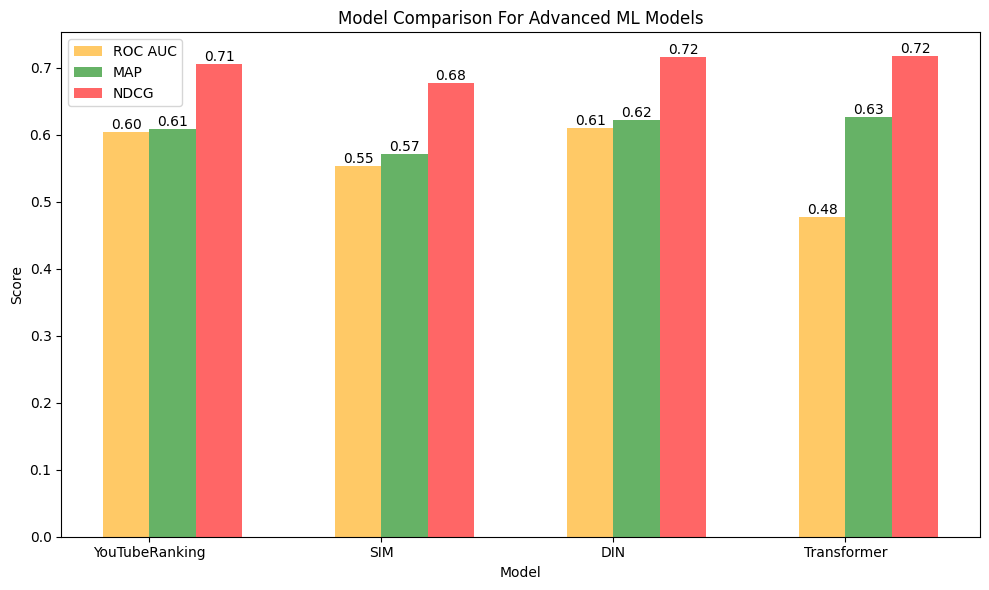

In [54]:
# prompt: modify the below code for my results dataframe, where i want to put ROC AUC, MAP AND NDGC
# plt.figure(figsize=(10, 6))
# # Set bar width
# bar_width = 0.35
# # Set positions for bars
# r1 = range(len(comparison_df))
# r2 = [x + bar_width for x in r1]
# # Plot Accuracy
# bars1 = plt.bar(r1, comparison_df["Accuracy"], color="blue", width=bar_width, label="Accuracy", alpha=0.6)
# # Plot ROC-AUC
# bars2 = plt.bar(r2, comparison_df["ROC-AUC"], color="orange", width=bar_width, label="ROC-AUC", alpha=0.6)
# # Add values on top of each bar
# for bar in bars1:
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
# for bar in bars2:
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
# # Add labels and title
# plt.title("Model Comparison (All Features)")
# plt.xlabel("Model")
# plt.ylabel("Score")
# plt.xticks([r + bar_width / 2 for r in range(len(comparison_df))], comparison_df["Model"])
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Set positions for bars
r1 = range(len(results))
#r1 = [x + bar_width for x in r1]
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot metrics
#bars1 = plt.bar(r1, results["Loss"], color="blue", width=bar_width, label="Loss", alpha=0.6)
bars1 = plt.bar(r2, results["ROC AUC"], color="orange", width=bar_width, label="ROC AUC", alpha=0.6)
bars2 = plt.bar(r3, results["MAP"], color="green", width=bar_width, label="MAP", alpha=0.6)
bars3 = plt.bar(r4, results["NDCG"], color="red", width=bar_width, label="NDCG", alpha=0.6)


# Add values on top of each bar
def add_labels(bars):
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)


# Add labels and title
plt.title("Model Comparison For Advanced ML Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks([r + bar_width * 1.5 for r in range(len(results))], results["Model"])
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


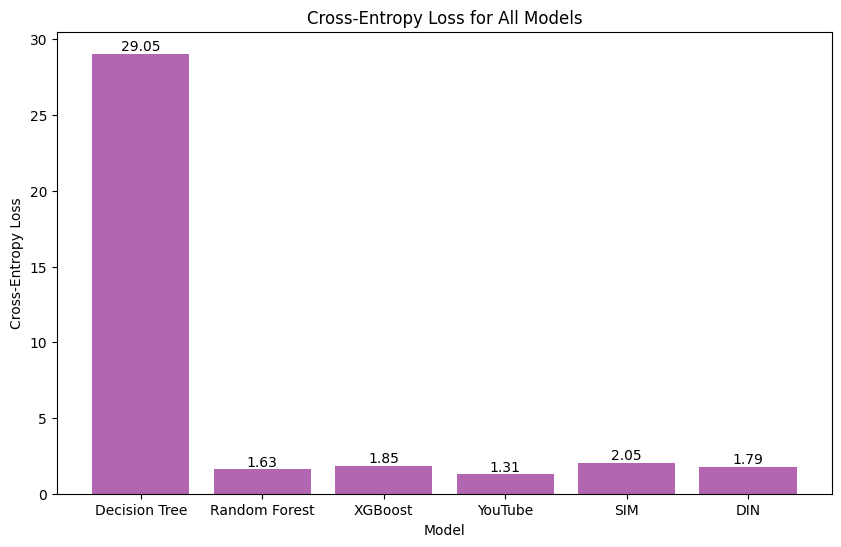

In [53]:
# prompt: # Plot the cross-entropy loss for all models
# cross_entropy_losses = {
#     "Decision Tree": 29.05,
#     "Random Forest": 1.63,
#     "XGBoost": 1.85, "YouTube":1.307 ,"SIM":2.046,"DIN":1.7889
# }
# cross_entropy_df = pd.DataFrame(list(cross_entropy_losses.items()), columns=["Model", "Cross-Entropy Loss"])
# plt.figure(figsize=(10, 6))
# bars = plt.bar(cross_entropy_df["Model"], cross_entropy_df["Cross-Entropy Loss"], color="purple", alpha=0.6)
# # Add values on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
# plt.title("Cross-Entropy Loss for All Models")
# plt.xlabel("Model")
# plt.ylabel("Cross-Entropy Loss")
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Plot the cross-entropy loss for all models
cross_entropy_losses = {
    "Decision Tree": 29.05,
    "Random Forest": 1.63,
    "XGBoost": 1.85, "YouTube":1.307 ,"SIM":2.046,"DIN":1.7889
}
cross_entropy_df = pd.DataFrame(list(cross_entropy_losses.items()), columns=["Model", "Cross-Entropy Loss"])
plt.figure(figsize=(10, 6))
bars = plt.bar(cross_entropy_df["Model"], cross_entropy_df["Cross-Entropy Loss"], color="purple", alpha=0.6)
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
plt.title("Cross-Entropy Loss for All Models")
plt.xlabel("Model")
plt.ylabel("Cross-Entropy Loss")
plt.show()


## Model Evaluate with various sampling techniques

## Random log or Popular Sampling
has a higher probability to sample popular items as negative samples


In [ ]:
model_with_random_log = generate_model(YouTubeRanking,"ranking",data_info,sampler="popular")

In [ ]:
model_train(model_with_random_log,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-04-26 15:13:09
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
train: 100%|██████████| 40/40 [00:00<00:00, 58.57it/s]


Epoch 1 elapsed: 0.685s


train: 100%|██████████| 40/40 [00:00<00:00, 74.70it/s]


Epoch 2 elapsed: 0.537s


train: 100%|██████████| 40/40 [00:00<00:00, 67.48it/s]


Epoch 3 elapsed: 0.594s


train: 100%|██████████| 40/40 [00:00<00:00, 66.32it/s]


Epoch 4 elapsed: 0.604s


train: 100%|██████████| 40/40 [00:00<00:00, 62.73it/s]


Epoch 5 elapsed: 0.639s


train: 100%|██████████| 40/40 [00:00<00:00, 67.86it/s]


Epoch 6 elapsed: 0.590s


train: 100%|██████████| 40/40 [00:00<00:00, 68.62it/s]


Epoch 7 elapsed: 0.584s


train: 100%|██████████| 40/40 [00:00<00:00, 64.93it/s]


Epoch 8 elapsed: 0.617s


train: 100%|██████████| 40/40 [00:00<00:00, 65.51it/s]


Epoch 9 elapsed: 0.612s


train: 100%|██████████| 40/40 [00:00<00:00, 63.76it/s]


Epoch 10 elapsed: 0.628s


train: 100%|██████████| 40/40 [00:00<00:00, 61.25it/s]


Epoch 11 elapsed: 0.654s


train: 100%|██████████| 40/40 [00:00<00:00, 69.34it/s]


Epoch 12 elapsed: 0.578s


train: 100%|██████████| 40/40 [00:00<00:00, 69.47it/s]


Epoch 13 elapsed: 0.577s


train: 100%|██████████| 40/40 [00:00<00:00, 70.67it/s]


Epoch 14 elapsed: 0.567s


train: 100%|██████████| 40/40 [00:00<00:00, 61.60it/s]


Epoch 15 elapsed: 0.650s


train: 100%|██████████| 40/40 [00:00<00:00, 65.71it/s]


Epoch 16 elapsed: 0.610s


train: 100%|██████████| 40/40 [00:00<00:00, 67.55it/s]


Epoch 17 elapsed: 0.593s


train: 100%|██████████| 40/40 [00:00<00:00, 66.05it/s]


Epoch 18 elapsed: 0.607s


train: 100%|██████████| 40/40 [00:00<00:00, 69.65it/s]


Epoch 19 elapsed: 0.575s


train: 100%|██████████| 40/40 [00:00<00:00, 70.32it/s]


Epoch 20 elapsed: 0.570s


In [ ]:
n_rec = min(7, data_info.n_items)
popular_results = evaluate_model(model_with_random_log,test_data, ["loss","roc_auc","recall","map"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.04it/s]


## Random Uniform Sampling


In [ ]:
model_with_uniform = generate_model(YouTubeRanking,"ranking",data_info,sampler="random")

In [ ]:
model_train(model_with_uniform,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-04-26 15:13:35
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
train: 100%|██████████| 40/40 [00:00<00:00, 56.16it/s]


Epoch 1 elapsed: 0.713s


train: 100%|██████████| 40/40 [00:00<00:00, 68.83it/s]


Epoch 2 elapsed: 0.582s


train: 100%|██████████| 40/40 [00:00<00:00, 69.90it/s]


Epoch 3 elapsed: 0.573s


train: 100%|██████████| 40/40 [00:00<00:00, 65.88it/s]


Epoch 4 elapsed: 0.608s


train: 100%|██████████| 40/40 [00:00<00:00, 68.49it/s]


Epoch 5 elapsed: 0.585s


train: 100%|██████████| 40/40 [00:00<00:00, 66.30it/s]


Epoch 6 elapsed: 0.604s


train: 100%|██████████| 40/40 [00:00<00:00, 65.16it/s]


Epoch 7 elapsed: 0.615s


train: 100%|██████████| 40/40 [00:00<00:00, 66.50it/s]


Epoch 8 elapsed: 0.602s


train: 100%|██████████| 40/40 [00:00<00:00, 63.95it/s]


Epoch 9 elapsed: 0.626s


train: 100%|██████████| 40/40 [00:00<00:00, 66.24it/s]


Epoch 10 elapsed: 0.605s


train: 100%|██████████| 40/40 [00:00<00:00, 66.65it/s]


Epoch 11 elapsed: 0.601s


train: 100%|██████████| 40/40 [00:00<00:00, 68.16it/s]


Epoch 12 elapsed: 0.588s


train: 100%|██████████| 40/40 [00:00<00:00, 68.23it/s]


Epoch 13 elapsed: 0.587s


train: 100%|██████████| 40/40 [00:00<00:00, 66.56it/s]


Epoch 14 elapsed: 0.602s


train: 100%|██████████| 40/40 [00:00<00:00, 60.50it/s]


Epoch 15 elapsed: 0.662s


train: 100%|██████████| 40/40 [00:00<00:00, 65.76it/s]


Epoch 16 elapsed: 0.609s


train: 100%|██████████| 40/40 [00:00<00:00, 61.06it/s]


Epoch 17 elapsed: 0.656s


train: 100%|██████████| 40/40 [00:00<00:00, 68.32it/s]


Epoch 18 elapsed: 0.586s


train: 100%|██████████| 40/40 [00:00<00:00, 63.48it/s]


Epoch 19 elapsed: 0.631s


train: 100%|██████████| 40/40 [00:00<00:00, 67.17it/s]


Epoch 20 elapsed: 0.596s


In [ ]:
n_rec = min(7, data_info.n_items)
uniform_results = evaluate_model(model_with_uniform,test_data, ["loss","roc_auc","recall","map"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.07it/s]


## Unconsumed Sampling
samples items that the target user did not consume before

In [ ]:
model_with_unconsumed = generate_model(YouTubeRanking,"ranking",data_info,sampler="unconsumed")

In [ ]:
model_train(model_with_unconsumed,train_data,["loss","precision","accuracy","recall"])

Training start time: 2025-04-26 15:13:50
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
train: 100%|██████████| 40/40 [00:00<00:00, 58.87it/s]


Epoch 1 elapsed: 0.680s


train: 100%|██████████| 40/40 [00:00<00:00, 72.83it/s]


Epoch 2 elapsed: 0.550s


train: 100%|██████████| 40/40 [00:00<00:00, 67.02it/s]


Epoch 3 elapsed: 0.598s


train: 100%|██████████| 40/40 [00:00<00:00, 68.49it/s]


Epoch 4 elapsed: 0.585s


train: 100%|██████████| 40/40 [00:00<00:00, 68.45it/s]


Epoch 5 elapsed: 0.585s


train: 100%|██████████| 40/40 [00:00<00:00, 67.57it/s]


Epoch 6 elapsed: 0.593s


train: 100%|██████████| 40/40 [00:00<00:00, 67.18it/s]


Epoch 7 elapsed: 0.596s


train: 100%|██████████| 40/40 [00:00<00:00, 69.88it/s]


Epoch 8 elapsed: 0.573s


train: 100%|██████████| 40/40 [00:00<00:00, 64.68it/s]


Epoch 9 elapsed: 0.619s


train: 100%|██████████| 40/40 [00:00<00:00, 66.13it/s]


Epoch 10 elapsed: 0.606s


train: 100%|██████████| 40/40 [00:00<00:00, 63.14it/s]


Epoch 11 elapsed: 0.634s


train: 100%|██████████| 40/40 [00:00<00:00, 67.24it/s]


Epoch 12 elapsed: 0.596s


train: 100%|██████████| 40/40 [00:00<00:00, 64.72it/s]


Epoch 13 elapsed: 0.619s


train: 100%|██████████| 40/40 [00:00<00:00, 66.51it/s]


Epoch 14 elapsed: 0.602s


train: 100%|██████████| 40/40 [00:00<00:00, 67.97it/s]


Epoch 15 elapsed: 0.589s


train: 100%|██████████| 40/40 [00:00<00:00, 67.77it/s]


Epoch 16 elapsed: 0.591s


train: 100%|██████████| 40/40 [00:00<00:00, 68.52it/s]


Epoch 17 elapsed: 0.585s


train: 100%|██████████| 40/40 [00:00<00:00, 61.19it/s]


Epoch 18 elapsed: 0.655s


train: 100%|██████████| 40/40 [00:00<00:00, 66.35it/s]


Epoch 19 elapsed: 0.604s


train: 100%|██████████| 40/40 [00:00<00:00, 69.12it/s]


Epoch 20 elapsed: 0.580s


In [ ]:
n_rec = min(7, data_info.n_items)
unconsumed_results = evaluate_model(model_with_unconsumed,test_data, ["loss","roc_auc","recall","map"],k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.13it/s]


## Overall

In [ ]:
sampling_techniques = ['Popular', 'Random Uniform', 'Unconsumed']
cross_entropy_loss = [popular_results['loss'], uniform_results['loss'], unconsumed_results['loss']]
roc_auc = [popular_results['roc_auc'], uniform_results['roc_auc'], unconsumed_results['roc_auc']]
map = [popular_results['map'], uniform_results['map'], unconsumed_results['map']]

df = pd.DataFrame({
    'Sampling Techniques': sampling_techniques,
    'Cross-entropy loss': cross_entropy_loss,
    'ROC_AUC': roc_auc,
    'MAP': map
})

df


,Sampling Techniques,Cross-entropy loss,ROC_AUC,MAP
0,Popular,1.233436,0.597500,0.598252
1,Random Uniform,1.384415,0.600848,0.606958
2,Unconsumed,1.375835,0.620709,0.623832


### Effect of number of epochs on metrics

In [ ]:
metrics_at_epochs = []
for epoch in range(1, 31):
  model_with_epoch = generate_model(YouTubeRanking, "ranking", data_info, n_epochs=epoch)
  model_train(model_with_epoch, train_data, ["loss", "roc_auc", "map"], verbose=False)
  n_rec = min(7, data_info.n_items)
  results = evaluate_model(model_with_epoch, test_data, ["loss", "roc_auc", "map"], k=n_rec)
  metrics_at_epochs.append(results)

# Extract the metrics
loss_at_epochs = [result["loss"] for result in metrics_at_epochs]
roc_auc_at_epochs = [result["roc_auc"] for result in metrics_at_epochs]
map_at_epochs = [result["map"] for result in metrics_at_epochs]

# Plot the metrics
import matplotlib.pyplot as plt

plt.plot(range(1, 31), loss_at_epochs, label="Loss")
plt.plot(range(1, 31), roc_auc_at_epochs, label="ROC AUC")
plt.plot(range(1, 31), map_at_epochs, label="MAP")

plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Effect of Number of Epochs on Metrics")
plt.legend()
plt.show()

# Find the peak points
peak_loss_epoch = loss_at_epochs.index(min(loss_at_epochs)) + 1
peak_roc_auc_epoch = roc_auc_at_epochs.index(max(roc_auc_at_epochs)) + 1
peak_map_epoch = map_at_epochs.index(max(map_at_epochs)) + 1

print("Peak Loss Epoch:", peak_loss_epoch)
print("Peak ROC AUC Epoch:", peak_roc_auc_epoch)
print("Peak MAP Epoch:", peak_map_epoch)


Training start time: 2025-04-26 15:14:17
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.45it/s]
/opt/anaconda3/envs

Training start time: 2025-04-26 15:14:19
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.51it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:21
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.89it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:24
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.27it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:27
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.17it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:31
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.12it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:35
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.89it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:40
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 18.12it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:45
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.32it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:51
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.71it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:14:57
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.96it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:05
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.56it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:13
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.90it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:21
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.77it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:29
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.81it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:38
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.71it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:47
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.03it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:15:58
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.59it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:16:09
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.72it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:16:19
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.63it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:16:33
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.90it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:16:47
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.21it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:17:01
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.72it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:17:16
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.22it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:17:30
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.84it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:17:45
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.68it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:18:00
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.07it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:18:16
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 14.24it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:18:34
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.75it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:18:52
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 17.42it/s]


ModuleNotFoundError: No module named 'matplotlib'

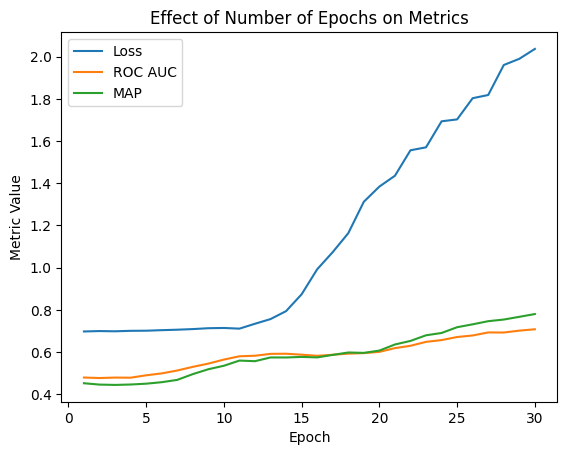

Peak Loss Epoch: 1
Peak ROC AUC Epoch: 30
Peak MAP Epoch: 30


In [ ]:
# Plot the metrics
import matplotlib.pyplot as plt

plt.plot(range(1, 31), loss_at_epochs, label="Loss")
plt.plot(range(1, 31), roc_auc_at_epochs, label="ROC AUC")
plt.plot(range(1, 31), map_at_epochs, label="MAP")

plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Effect of Number of Epochs on Metrics")
plt.legend()
plt.show()

# Find the peak points
peak_loss_epoch = loss_at_epochs.index(min(loss_at_epochs)) + 1
peak_roc_auc_epoch = roc_auc_at_epochs.index(max(roc_auc_at_epochs)) + 1
peak_map_epoch = map_at_epochs.index(max(map_at_epochs)) + 1

print("Peak Loss Epoch:", peak_loss_epoch)
print("Peak ROC AUC Epoch:", peak_roc_auc_epoch)
print("Peak MAP Epoch:", peak_map_epoch)

Training start time: 2025-04-26 15:20:45
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.63it/s]
/opt/anaconda3/envs

Training start time: 2025-04-26 15:20:59
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 16.01it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:21:11
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.61it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:21:23
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 13.31it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:21:36
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.32it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:21:48


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.52it/s]


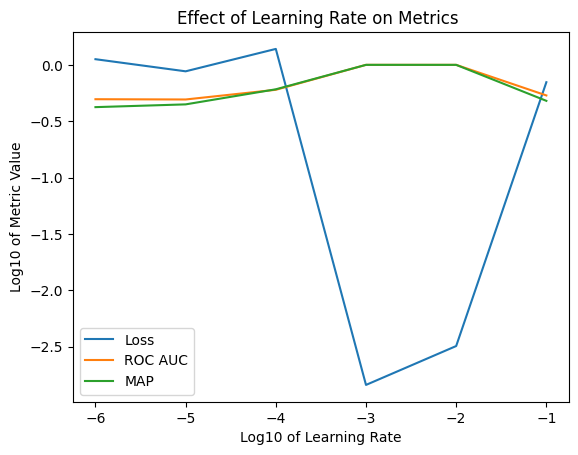

Peak Loss Learning Rate: 0.001
Peak ROC AUC Learning Rate: 0.001
Peak MAP Learning Rate: 0.001


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
metrics_at_learning_rates = []
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for lr in learning_rates:
  model_with_lr = generate_model(YouTubeRanking, "ranking", data_info, lr=lr)
  model_train(model_with_lr, train_data, ["loss", "roc_auc", "map"], verbose=False)
  n_rec = min(7, data_info.n_items)
  results = evaluate_model(model_with_lr, test_data, ["loss", "roc_auc", "map"], k=n_rec)
  metrics_at_learning_rates.append(results)

# Extract the metrics
loss_at_learning_rates = [result["loss"] for result in metrics_at_learning_rates]
roc_auc_at_learning_rates = [result["roc_auc"] for result in metrics_at_learning_rates]
map_at_learning_rates = [result["map"] for result in metrics_at_learning_rates]

# Plot the metrics

plt.plot(np.log10(learning_rates), np.log10(loss_at_learning_rates), label="Loss")
plt.plot(np.log10(learning_rates), np.log10(roc_auc_at_learning_rates), label="ROC AUC")
plt.plot(np.log10(learning_rates), np.log10(map_at_learning_rates), label="MAP")

plt.xlabel("Log10 of Learning Rate")
plt.ylabel("Log10 of Metric Value")
plt.title("Effect of Learning Rate on Metrics ")
plt.legend()
plt.show()

# Find the peak points
peak_loss_lr = learning_rates[loss_at_learning_rates.index(min(loss_at_learning_rates))]
peak_roc_auc_lr = learning_rates[roc_auc_at_learning_rates.index(max(roc_auc_at_learning_rates))]
peak_map_lr = learning_rates[map_at_learning_rates.index(max(map_at_learning_rates))]

print("Peak Loss Learning Rate:", peak_loss_lr)
print("Peak ROC AUC Learning Rate:", peak_roc_auc_lr)
print("Peak MAP Learning Rate:", peak_map_lr)


In [ ]:
# prompt: write code to make a table in pandas showing the different metrics at different number of hidden units

metrics_at_hidden_units = []
hidden_units_list = [(512, 256, 128),(512,256,128,64),(512,256,128,64,32),(256, 128, 64),(256, 128, 64,32),(256, 128, 64,32,16),(128, 64, 32), (64, 32, 16)]
for hidden_units in hidden_units_list:
  model_with_hidden_units = generate_model(YouTubeRanking, "ranking", data_info, hidden_units=hidden_units)
  model_train(model_with_hidden_units, train_data, ["loss", "roc_auc", "map"], verbose=False)
  n_rec = min(7, data_info.n_items)
  results = evaluate_model(model_with_hidden_units, test_data, ["loss", "roc_auc", "map"], k=n_rec)
  metrics_at_hidden_units.append(results)

# Extract the metrics
loss_at_hidden_units = [result["loss"] for result in metrics_at_hidden_units]
roc_auc_at_hidden_units = [result["roc_auc"] for result in metrics_at_hidden_units]
map_at_hidden_units = [result["map"] for result in metrics_at_hidden_units]

# Create a table
df = pd.DataFrame({
    "Hidden Units": hidden_units_list,
    "Loss": loss_at_hidden_units,
    "ROC AUC": roc_auc_at_hidden_units,
    "MAP": map_at_hidden_units
})

# Print the table
print(df)

# Find the peak points
peak_loss_hidden_units = hidden_units_list[loss_at_hidden_units.index(min(loss_at_hidden_units))]
peak_roc_auc_hidden_units = hidden_units_list[roc_auc_at_hidden_units.index(max(roc_auc_at_hidden_units))]
peak_map_hidden_units = hidden_units_list[map_at_hidden_units.index(max(map_at_hidden_units))]

print("Peak Loss Hidden Units:", peak_loss_hidden_units)
print("Peak ROC AUC Hidden Units:", peak_roc_auc_hidden_units)
print("Peak MAP Hidden Units:", peak_map_hidden_units)


/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:22:02
total params: 1,416,609 | embedding params: 330,017 | network params: 1,086,592


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.76it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:22:15
total params: 1,425,057 | embedding params: 330,081 | network params: 1,094,976


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.63it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:22:29
total params: 1,427,233 | embedding params: 330,113 | network params: 1,097,120


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 15.98it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:22:43
total params: 833,697 | embedding params: 329,569 | network params: 504,128


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 21.57it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:22:53
total params: 835,873 | embedding params: 329,601 | network params: 506,272


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 21.24it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:23:03
total params: 836,449 | embedding params: 329,617 | network params: 506,832


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 19.90it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:23:13
total params: 572,961 | embedding params: 329,345 | network params: 243,616


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 23.72it/s]
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:23:20
total params: 450,273 | embedding params: 329,233 | network params: 121,040


eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 24.39it/s]

              Hidden Units      Loss   ROC AUC       MAP
0          (512, 256, 128)  1.384415  0.600848  0.606958
1      (512, 256, 128, 64)  1.580813  0.570528  0.566287
2  (512, 256, 128, 64, 32)  1.283159  0.577960  0.570605
3           (256, 128, 64)  1.048737  0.622205  0.642035
4       (256, 128, 64, 32)  0.934826  0.592061  0.587572
5   (256, 128, 64, 32, 16)  1.118482  0.534529  0.494793
6            (128, 64, 32)  0.952163  0.549379  0.510700
7             (64, 32, 16)  0.909902  0.525397  0.508848
Peak Loss Hidden Units: (64, 32, 16)
Peak ROC AUC Hidden Units: (256, 128, 64)
Peak MAP Hidden Units: (256, 128, 64)


## Optimized Model

In [ ]:
best_model = generate_model(YouTubeRanking, "ranking", data_info, n_epochs=20,lr=1e-3,sampler="unconsumed",hidden_units=(256,128,64))

In [ ]:
model_train(best_model, train_data, ["loss", "roc_auc", "map"], verbose=False)

/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)
/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/libreco/layers/dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


Training start time: 2025-04-26 15:23:27
total params: 833,697 | embedding params: 329,569 | network params: 504,128


In [ ]:
n_rec = min(7, data_info.n_items)
results = evaluate_model(best_model, test_data, ["loss", "roc_auc", "map"], k=n_rec)

eval_listwise: 100%|██████████| 7/7 [00:00<00:00, 22.02it/s]


In [ ]:
print(results)

{'loss': 0.002311069173575052, 'roc_auc': 1.0, 'map': 1.0}


## Save Model

In [ ]:
best_model.save("./model/HS-flares-frequency","HS-flares-frequency",inference_only=True)


file folder ./model/HS-flares-frequency doesn't exists, creating a new one...


In [ ]:
!zip -r /content/HS-flares-frequency.zip /content/HS-flares-frequency

	zip warning: name not matched: /content/HS-flares-frequency

zip error: Nothing to do! (try: zip -r /content/HS-flares-frequency.zip . -i /content/HS-flares-frequency)
